In [474]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [475]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [476]:
train

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12649,tour_idlln8s2r3,NETHERLANDS,25-44,With Other Friends/Relatives,0.0,2.0,Wildlife Tourism,Business,No,7,...,Yes,Yes,Yes,No,No,NaN,Stormy,30+,NaN,0.0
12650,tour_id3ta5n81h,KENYA,25-44,Alone,1.0,0.0,Hunting Tourism,Meetings and Conference,No,10,...,No,No,No,No,No,61-90,humid,7-14,NaN,1.0
12651,tour_id88nvd60z,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Widlife Tourism,Scientific and Academic,No,9,...,No,No,No,No,No,90+,"sunny,",1-6,NaN,1.0
12652,tour_iddw9van5i,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,7,...,Yes,Yes,Yes,Yes,Yes,61-90,"sunny,",7-14,NaN,0.0


In [477]:
train.columns

Index(['trip_ID', 'visitor_nation', 'age_bracket', 'travelling_with',
       'female_count', 'male_count', 'key_activity', 'trip_purpose',
       'first_time_visitor', 'mainland_nights', 'island_nights',
       'tour_arrangement', 'transport_package_international', 'source_of_info',
       'package_accomodation', 'food_package', 'transport_package_mx',
       'sightseeing_package', 'guided_tour_package', 'insurance_package',
       'days_before_booked', 'weather_at_arrival', 'tour_length',
       'special_requirements', 'category'],
      dtype='object')

### EDA and handling nulls

In [478]:
# percentage of nulls
test.isna().sum()/test.shape[0]

trip_ID                            0.000000
visitor_nation                     0.021531
age_bracket                        0.000000
travelling_with                    0.057758
female_count                       0.000000
male_count                         0.000342
key_activity                       0.011107
trip_purpose                       0.000000
first_time_visitor                 0.006664
mainland_nights                    0.000000
island_nights                      0.000000
tour_arrangement                   0.000000
transport_package_international    0.009740
source_of_info                     0.000000
package_accomodation               0.010595
food_package                       0.013329
transport_package_mx               0.000000
sightseeing_package                0.000000
guided_tour_package                0.000000
insurance_package                  0.018284
days_before_booked                 0.113978
weather_at_arrival                 0.272215
tour_length                     

In [479]:
train.special_requirements.value_counts()

special_requirements
none                    2964
dietary needs,           979
translator required.     504
wheelchair,               90
Name: count, dtype: int64

In [480]:
# fill special requirements field with none
train.special_requirements = train.special_requirements.fillna('none')

In [481]:
# drop the rows where the target is null
train = train[train['category'].notna()]

In [482]:
train[train.female_count.isna()]

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
10611,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Wildlife Tourism,Volunteering,Yes,15,...,No,No,No,No,No,61-90,Rainy,15-30,none,0.0
12612,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Wildlife Tourism,Leisure and Holidays,Yes,9,...,Yes,Yes,Yes,Yes,Yes,NaN,Rainy,1-6,none,2.0


In [483]:
train.loc[train.travelling_with == 'With Other Friends/Relatives','female_count'].mean()

1.8201536375960234

In [484]:
# fill with 2 since only 2 missing
train.loc[:,'female_count'] = train.female_count.fillna(2)

In [485]:
train[train.male_count.isna()]

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
3935,tour_idzmkp9sq6,CHINA,25-44,With Other Friends/Relatives,10.0,NaN,Wildlife Tourism,Leisure and Holidays,Yes,4,...,Yes,Yes,Yes,Yes,Yes,31-60,NaN,7-14,none,0.0
6965,tour_idcfe5lv3z,SOUTH AFRICA,25-44,With Other Friends/Relatives,0.0,NaN,Wildlife Tourism,Meetings and Conference,Yes,4,...,No,No,No,No,No,61-90,"Windy,",7-14,none,1.0
11012,tour_id41dez9e2,NETHERLANDS,45-64,With Other Friends/Relatives,11.0,NaN,Wildlife Tourism,Leisure and Holidays,Yes,5,...,Yes,No,No,Yes,NaN,90+,NaN,7-14,none,0.0
11142,tour_idaqxaa6li,FRANCE,25-44,NaN,0.0,NaN,Conference Tourism,Leisure and Holidays,Yes,6,...,Yes,Yes,Yes,Yes,Yes,NaN,NaN,15-30,translator required.,1.0


In [486]:
train.loc[train['travelling_with'] == 'With Other Friends/Relatives', 'male_count'].mean()

1.633363471971067

In [487]:
# fill using assumptions made with travelling_with field, since only 4 missing
train.loc[train.trip_ID == 'tour_idzmkp9sq6','male_count'] = 0
train.loc[train.trip_ID == 'tour_idcfe5lv3z','male_count'] = 2
train.loc[train.trip_ID == 'tour_id41dez9e2','male_count'] = 0
train.loc[train.trip_ID == 'tour_idaqxaa6li','male_count'] = 1

In [488]:
train.age_bracket.value_counts()

age_bracket
25-44    6130
45-64    3898
18-24    1493
65+      1009
<18        82
Name: count, dtype: int64

In [489]:
train[train.age_bracket.isna()].shape[0]

8

In [490]:
# fill the 8 missing values with mode
train.loc[:,'age_bracket'] = train['age_bracket'].fillna('25-44')

In [491]:
# nulls in travelling_with
train[train.travelling_with.isna()].shape[0]

733

In [492]:
# create a new feature, total_travellers
train.loc[:, 'total_travellers'] = train['female_count'] + train['male_count']

In [493]:
# there are rows with total_travellers = 0
train.loc[train.total_travellers == 0].shape[0]

59

In [494]:
# fill the female and male count using travelling_with to ensure that total_travellers != 0
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Spouse'), 'female_count'] = 1
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Spouse'), 'male_count'] = 1

train.loc[(train.total_travellers == 0) & (train.travelling_with == 'Alone'), 'male_count'] = 1

In [495]:
train[train['travelling_with'] == 'With Spouse and Children'].male_count.mean(), train[train['travelling_with'] == 'With Spouse and Children'].female_count.mean()

(1.9444444444444444, 1.9787234042553192)

In [496]:
# fill the female and male count using the mean travelling_with to ensure that total_travellers != 0
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Spouse and Children'), 'male_count'] = 2
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Spouse and Children'), 'female_count'] = 2

In [497]:
train[train['travelling_with'] == 'With Other Friends/Relatives'].female_count.mean(), train[train['travelling_with'] == 'With Other Friends/Relatives'].male_count.mean()

(1.820316027088036, 1.6320541760722347)

In [498]:
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Other Friends/Relatives'), 'male_count'] = 2
train.loc[(train.total_travellers == 0) & (train.travelling_with == 'With Other Friends/Relatives'), 'female_count'] = 2

In [499]:
train.loc[:, 'total_travellers'] = train['female_count'] + train['male_count']

In [500]:
train.loc[train.travelling_with.isna()][train.total_travellers == 0]

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category,total_travellers
8146,tour_idvuqr4z1e,UGANDA,18-24,NaN,0.0,0.0,Beach Tourism,Leisure and Holidays,Yes,3,...,No,No,No,No,61-90,"sunny,",30+,none,2.0,0.0
9088,tour_idgiheohsx,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,7,...,Yes,No,Yes,Yes,61-90,Stormy,1-6,none,0.0,0.0


In [501]:
# drop these 2 rows with total_travellers and travelling_with unknown
train = train[~((train.travelling_with.isna()) & (train.total_travellers == 0))]

In [502]:
train.loc[train.travelling_with.isna()].total_travellers.value_counts()

total_travellers
1.0     710
2.0      10
3.0       4
4.0       3
9.0       1
11.0      1
7.0       1
6.0       1
Name: count, dtype: int64

In [503]:
# fill the travelling_with of 1 total_traveller with 'Alone'
train.loc[train['travelling_with'].isna() & (train['total_travellers'] == 1), 'travelling_with'] = 'Alone'

In [504]:
# fill the travelling_with of 2 total_traveller with 'With Spouse'
train.loc[train['travelling_with'].isna() & (train['total_travellers'] == 2), 'travelling_with'] = 'With Spouse'

In [505]:
train.loc[(train.total_travellers > 2) & (train.total_travellers < 6)].travelling_with.value_counts()

travelling_with
With Spouse and Children        758
With Other Friends/Relatives    701
With Children                   127
With Spouse                      33
Alone                             5
Name: count, dtype: int64

In [506]:
train.loc[train['travelling_with'].isna() & (train['total_travellers'] < 6), 'travelling_with'] = 'With Spouse and Children'

In [507]:
train.loc[train.total_travellers >= 6].travelling_with.value_counts()

travelling_with
With Other Friends/Relatives    256
With Spouse and Children         56
With Spouse                      11
With Children                     8
Alone                             3
Name: count, dtype: int64

In [508]:
train.loc[train['travelling_with'].isna() & (train['total_travellers'] >= 6), 'travelling_with'] = 'With Other Friends/Relatives'

In [509]:
train.loc[train.travelling_with.isna()].shape[0]
# all the travelling_with have been filled

0

In [510]:
train.key_activity.value_counts()

key_activity
Widlife Tourism             4083
Beach Tourism               2852
Wildlife Tourism            1558
Conference Tourism          1321
Hunting Tourism             1088
Cultural Tourism             948
Mountain Climbing            327
Business                     187
Bird Tourism                 102
Diving and Sport Fishing      24
Name: count, dtype: int64

In [511]:
train.key_activity.replace('Widlife Tourism', 'Wildlife Tourism', inplace=True)
# spelling mistake in the data

In [512]:
train.loc[train.first_time_visitor.isna()].shape[0]

98

In [513]:
train.first_time_visitor.value_counts()

first_time_visitor
Yes    8738
No     3782
Name: count, dtype: int64

In [514]:
# fill first_time_visitor using mode
train.first_time_visitor.fillna('Yes', inplace=True)

In [515]:
train.transport_package_international.value_counts()

transport_package_international
No     8159
Yes    4313
Name: count, dtype: int64

In [516]:
# fill transport_package_international using mode
train.transport_package_international.fillna('No', inplace=True)

### Merging Expenditure Dataset

Dataset of international tourist expenditure by country of residence (to be used instead of visitor_nation)

https://www.ine.es/jaxiT3/Tabla.htm?t=23994&L=1

In [517]:
spending = pd.read_csv("country_wise_spending.csv")
spending.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"International tourism, expenditures (% of tota...",ST.INT.XPND.MP.ZS,Afghanistan,AFG,..,1.697663124,1.784392302,1.214606325,1.633893247,2.829371746,2.279257999,0.701718914
1,"International tourism, expenditures (% of tota...",ST.INT.XPND.MP.ZS,Albania,ALB,21.47670888,27.07070815,25.85666414,24.58921142,24.05898695,25.53146747,26.7405365,14.19431235
2,"International tourism, expenditures (% of tota...",ST.INT.XPND.MP.ZS,Algeria,DZA,..,0.952784991,1.203977202,0.923644159,1.051869858,0.901999675,1.234818416,0.642311585
3,"International tourism, expenditures (% of tota...",ST.INT.XPND.MP.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..
4,"International tourism, expenditures (% of tota...",ST.INT.XPND.MP.ZS,Andorra,AND,..,..,..,..,..,..,9.202301386,..


In [518]:
spending['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

In [519]:
import numpy as np

def str_toupper(st):
    return st.upper()

spending.replace('..', np.nan, inplace=True)
spending['Country Name'] = spending['Country Name'].map(str_toupper)

# cleanup country name

In [520]:
spending.isna().sum()

Series Name       0
Series Code       0
Country Name      0
Country Code      0
2000 [YR2000]    99
2014 [YR2014]    58
2015 [YR2015]    58
2016 [YR2016]    56
2017 [YR2017]    62
2018 [YR2018]    63
2019 [YR2019]    77
2020 [YR2020]    99
dtype: int64

In [521]:
# Filling null values with the previous year's data if it exists
spending['2019 [YR2019]'].fillna(spending['2018 [YR2018]'], inplace=True)

In [522]:
spending.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [523]:
spending = spending[['Country Name', '2019 [YR2019]']]
spending.columns = ['visitor_nation', 'spending']

# merge on visitor_nation
train = pd.merge(train, spending, on='visitor_nation')

In [524]:
train[train['spending'].isna()]['visitor_nation'].unique()

array(['KENYA', 'UNITED KINGDOM', 'SWEDEN', 'SPAIN', 'CANADA', 'CHINA',
       'BURUNDI', 'UNITED ARAB EMIRATES', 'LATVIA', 'LIBERIA', 'ICELAND',
       'LITHUANIA'], dtype=object)

In [525]:
# For the remaining null values, grouped the countries based on average income 
# and imputed the average value for each group.

high_income_countries = [
    'CANADA', 'ICELAND', 'LATVIA', 'LITHUANIA', 'SPAIN', 
    'SWEDEN', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM'
]

upper_middle_income_countries = ['CHINA']
lower_middle_income_countries = ['KENYA']
low_income_countries = ['BURUNDI', 'LIBERIA']

train.loc[train['visitor_nation'].isin(high_income_countries), 'spending'] = 10.49669737
train.loc[train['visitor_nation'].isin(upper_middle_income_countries), 'spending'] = 8.356929506
train.loc[train['visitor_nation'].isin(lower_middle_income_countries), 'spending'] = 7.781739015
train.loc[train['visitor_nation'].isin(low_income_countries), 'spending'] = 4.263060223


In [526]:
train[train['spending'].isna()]['visitor_nation'].unique()

array([], dtype=object)

### Adding GDP of Countries

taken from https://www.kaggle.com/datasets/nitishabharathi/gdp-per-capita-all-countries

this was not used in the final model since the spending feature gave a better score

In [527]:
gdp = pd.read_csv('GDP.csv')

In [528]:
gdp

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,NaN
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,NaN
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,NaN
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,NaN


In [529]:
gdp = gdp[['Country ', '2018']]

In [530]:
def str_toupper(st):
    return st.upper()

In [531]:
gdp['Country '] = gdp['Country '].map(str_toupper)

In [532]:
gdp['Country ']

0             ARUBA
1       AFGHANISTAN
2            ANGOLA
3           ALBANIA
4        ARAB WORLD
           ...     
255          KOSOVO
256     YEMEN, REP.
257    SOUTH AFRICA
258          ZAMBIA
259        ZIMBABWE
Name: Country , Length: 260, dtype: object

In [533]:
gdp.columns = ['visitor_nation', 'gdp']

In [534]:
train = pd.merge(train, gdp, on='visitor_nation')

In [535]:

train[train['gdp'].isna()]

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category,total_travellers,spending,gdp
223,tour_idg63gd0yb,BERMUDA,25-44,With Other Friends/Relatives,2.0,0.0,Conference Tourism,Leisure and Holidays,Yes,9,...,Yes,No,90+,NaN,7-14,none,0.0,2.0,15.37892575,NaN
3943,tour_idutns9o19,BERMUDA,45-64,With Spouse,1.0,1.0,Wildlife Tourism,Leisure and Holidays,Yes,8,...,Yes,No,61-90,"sunny,",15-30,none,0.0,2.0,15.37892575,NaN
7337,tour_idrzx1lys7,BERMUDA,25-44,With Other Friends/Relatives,6.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,10,...,Yes,No,90+,"cloudy,",7-14,none,0.0,6.0,15.37892575,NaN
8107,tour_idxgj98h8f,BERMUDA,18-24,Alone,1.0,0.0,Cultural Tourism,Volunteering,Yes,70,...,No,No,61-90,"sunny,",7-14,none,2.0,1.0,15.37892575,NaN


In [536]:
# Manually adding the value for Bermuda since it's missing in the dataset

train.loc[train['gdp'].isna(), 'gdp'] = 111540

In [537]:
train[train['visitor_nation'] == 'BERMUDA']

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category,total_travellers,spending,gdp
223,tour_idg63gd0yb,BERMUDA,25-44,With Other Friends/Relatives,2.0,0.0,Conference Tourism,Leisure and Holidays,Yes,9,...,Yes,No,90+,NaN,7-14,none,0.0,2.0,15.37892575,111540.0
3943,tour_idutns9o19,BERMUDA,45-64,With Spouse,1.0,1.0,Wildlife Tourism,Leisure and Holidays,Yes,8,...,Yes,No,61-90,"sunny,",15-30,none,0.0,2.0,15.37892575,111540.0
7337,tour_idrzx1lys7,BERMUDA,25-44,With Other Friends/Relatives,6.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,10,...,Yes,No,90+,"cloudy,",7-14,none,0.0,6.0,15.37892575,111540.0
8107,tour_idxgj98h8f,BERMUDA,18-24,Alone,1.0,0.0,Cultural Tourism,Volunteering,Yes,70,...,No,No,61-90,"sunny,",7-14,none,2.0,1.0,15.37892575,111540.0


In [538]:
train.isna().sum()/train.shape[0]

trip_ID                            0.000000
visitor_nation                     0.000000
age_bracket                        0.000000
travelling_with                    0.000000
female_count                       0.000000
male_count                         0.000000
key_activity                       0.010394
trip_purpose                       0.000000
first_time_visitor                 0.000000
mainland_nights                    0.000000
island_nights                      0.000000
tour_arrangement                   0.000000
transport_package_international    0.000000
source_of_info                     0.000000
package_accomodation               0.011312
food_package                       0.012840
transport_package_mx               0.000000
sightseeing_package                0.000000
guided_tour_package                0.000000
insurance_package                  0.019974
days_before_booked                 0.126159
weather_at_arrival                 0.268827
tour_length                     

In [539]:
# fill rest of the nulls with 'unknown' since they are categorical
train.fillna('unknown', inplace=True)

In [540]:
train.isna().sum()

trip_ID                            0
visitor_nation                     0
age_bracket                        0
travelling_with                    0
female_count                       0
male_count                         0
key_activity                       0
trip_purpose                       0
first_time_visitor                 0
mainland_nights                    0
island_nights                      0
tour_arrangement                   0
transport_package_international    0
source_of_info                     0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
days_before_booked                 0
weather_at_arrival                 0
tour_length                        0
special_requirements               0
category                           0
total_travellers                   0
spending                           0
g

In [541]:
# creating more derived features

train['total_nights'] = train['mainland_nights'] + train['island_nights']
train['booked_late'] = train['days_before_booked'].map(lambda x: int(x == '1-7 '))
train['ratio'] = train['male_count']/train['female_count']

In [542]:
# filled the inf in ratio field with the max

train.fillna(12, inplace=True)
train.replace(np.inf, 12, inplace=True)

In [543]:
train['ratio'].replace(-np.inf, 12, inplace=True)

In [544]:
train.columns

Index(['trip_ID', 'visitor_nation', 'age_bracket', 'travelling_with',
       'female_count', 'male_count', 'key_activity', 'trip_purpose',
       'first_time_visitor', 'mainland_nights', 'island_nights',
       'tour_arrangement', 'transport_package_international', 'source_of_info',
       'package_accomodation', 'food_package', 'transport_package_mx',
       'sightseeing_package', 'guided_tour_package', 'insurance_package',
       'days_before_booked', 'weather_at_arrival', 'tour_length',
       'special_requirements', 'category', 'total_travellers', 'spending',
       'gdp', 'total_nights', 'booked_late', 'ratio'],
      dtype='object')

In [545]:
train.source_of_info.value_counts()

source_of_info
Travel agent, tour operator        4099
Friends, relatives                 3246
Others                              770
Newspaper, magazines, brochures     752
Radio, TV, Web                      655
Trade fair                          130
Mexican Mission Abroad              108
Inflight magazines                   53
Name: count, dtype: int64

In [546]:
# checking the spending distribution of each bucket in age_bracket

age_spending_distribution = (
    train.groupby('age_bracket')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)
age_spending_distribution

,age_bracket,category,percentage
0,18-24,1.0,47.543582
1,18-24,0.0,35.499208
2,18-24,2.0,16.957211
3,25-44,1.0,44.768133
4,25-44,0.0,39.813714
5,25-44,2.0,15.418153
6,45-64,0.0,56.914713
7,45-64,1.0,34.182807
8,45-64,2.0,8.902480
9,65+,0.0,66.937120


In [547]:
(
    train.groupby('travelling_with')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,travelling_with,category,percentage
0,Alone,1.0,56.539899
1,Alone,0.0,22.026819
2,Alone,2.0,21.433282
3,With Children,0.0,58.528428
4,With Children,1.0,32.107023
5,With Children,2.0,9.364548
6,With Other Friends/Relatives,0.0,51.586369
7,With Other Friends/Relatives,1.0,36.956522
8,With Other Friends/Relatives,2.0,11.457109
9,With Spouse,0.0,73.594616


In [548]:


(
    train.groupby('key_activity')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,key_activity,category,percentage
0,Beach Tourism,0.0,50.315956
1,Beach Tourism,1.0,40.600316
2,Beach Tourism,2.0,9.083728
3,Bird Tourism,1.0,48.648649
4,Bird Tourism,0.0,29.729730
5,Bird Tourism,2.0,21.621622
6,Business,0.0,55.621302
7,Business,1.0,35.502959
8,Business,2.0,8.875740
9,Conference Tourism,0.0,53.814852


In [549]:
(
    train.groupby('trip_purpose')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,trip_purpose,category,percentage
0,Business,1.0,61.440360
1,Business,2.0,30.307577
2,Business,0.0,8.252063
3,Leisure and Holidays,0.0,66.163934
4,Leisure and Holidays,1.0,30.147541
5,Leisure and Holidays,2.0,3.688525
6,Medical,0.0,50.000000
7,Medical,1.0,50.000000
8,Meetings and Conference,1.0,71.473851
9,Meetings and Conference,2.0,18.541997


In [550]:
(
    train.groupby('source_of_info')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,source_of_info,category,percentage
0,"Friends, relatives",1.0,52.741836
1,"Friends, relatives",0.0,23.721503
2,"Friends, relatives",2.0,23.536661
3,Inflight magazines,1.0,62.264151
4,Inflight magazines,2.0,24.528302
5,Inflight magazines,0.0,13.207547
6,Mexican Mission Abroad,1.0,60.185185
7,Mexican Mission Abroad,0.0,27.777778
8,Mexican Mission Abroad,2.0,12.037037
9,"Newspaper, magazines, brochures",0.0,45.744681


In [551]:
(
    train.groupby('trip_purpose')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,trip_purpose,category,percentage
0,Business,1.0,61.440360
1,Business,2.0,30.307577
2,Business,0.0,8.252063
3,Leisure and Holidays,0.0,66.163934
4,Leisure and Holidays,1.0,30.147541
5,Leisure and Holidays,2.0,3.688525
6,Medical,0.0,50.000000
7,Medical,1.0,50.000000
8,Meetings and Conference,1.0,71.473851
9,Meetings and Conference,2.0,18.541997


In [552]:

(
    train.groupby('days_before_booked')['category']
    .value_counts(normalize=True)
    .mul(100)  # Convert to percentage
    .rename('percentage')
    .reset_index()
)


,days_before_booked,category,percentage
0,1-7,0.0,52.892562
1,1-7,1.0,32.231405
2,1-7,2.0,14.876033
3,15-30,0.0,46.899841
4,15-30,1.0,41.017488
5,15-30,2.0,12.082671
6,31-60,0.0,44.814241
7,31-60,1.0,42.569659
8,31-60,2.0,12.616099
9,61-90,0.0,45.079951


### Ordinal Mapping

In [553]:

# decided based on the spending distribution seen above

# Using midpoints of the range
age_bracket_ordinal_mapping = {'<18':9, '18-24':21, '25-44':35, '45-64':55, '65+':70}

travelling_with_ordinal_mapping = {
    'Alone': 1,
    'With Spouse': 2,
    'With Other Friends/Relatives': 3,
    'With Children': 3,
    'With Spouse and Children': 3,
    'unknown': 3
} 

key_activity_ordinal_mapping = {
    "Wildlife Tourism": 1,
    "Conference Tourism": 2,
    "Business": 2,
    "Beach Tourism": 3,
    "Mountain Climbing": 4,
    "Cultural Tourism": 5,
    "Bird Tourism": 5,
    "Hunting Tourism": 6,
    "Diving and Sport Fishing": 4,
    "Other": 4,
    "unknown": 4 # give a neutral medium value
}

trip_purpose_mapping = {
    "Business": 1,                  
    "Meetings and Conference": 2,
    "Scientific and Academic": 2,
    "Volunteering": 3,
    "Visiting Friends and Relatives": 4,  
    "Leisure and Holidays": 5,
    "Other": 3,
    "Medical": 5,
    "unknown": 3
}


transport_package_international_ordinal_mapping = {'No':0, 'Yes':1}

first_time_visitor_ordinal_mapping = {'No':0, 'Yes':1}

tour_arrangement_ordinal_mapping = {'Independent':0, 'Package Tour':1}

transport_package_international_ordinal_mapping = {'No':0, 'Yes':1}

source_of_info_mapping = {
    "Inflight magazines": 1,
    "Trade fair": 1,
    "Mexican Mission Abroad": 2,
    "Others": 3,
    "Radio, TV, Web": 4,
    "Friends, relatives": 4,
    "Newspaper, magazines, brochures": 5,
    "Travel agent, tour operator": 5,      
    "unknown": 3
}


package_accomodation_ordinal_mapping = {'No':0, 'unknown': 1, 'Yes':2}

food_package_ordinal_mapping = {'No':0, 'unknown': 1, 'Yes':2}

transport_package_mx_ordinal_mapping = {'No':0, 'Yes':1}

sightseeing_package_ordinal_mapping = {'No':0, 'Yes':1}

guided_tour_package_ordinal_mapping = {'No':0, 'Yes':1}

insurance_package_ordinal_mapping = {'No':0, 'unknown': 1, 'Yes':2}


days_before_booked_ordinal_mapping = {
    "31-60": 45,
    "8-14": 11,
    "61-90": 75,
    "15-30 ": 22,
    "90+": 100,
    "1-7 ": 4,
    "unknown": 22 
}


weather_at_arrival_ordinal_mapping = {
     "cloudy,": 1,
    "Windy,": 2,
    "humid": 2,
    "sunny,": 2,
    "other": 2,
    "Rainy": 3,
    "Stormy": 3,
    "unknown": 2
}


tour_length_ordinal_mapping = {
    "7-14": 10,
    "1-6": 3,
    "30+": 40,
    "15-30": 22,
    "unknown": 20
}

special_requirements_ordinal_mapping = {
    "none": 1,
    "wheelchair,": 2,
    "dietary needs,": 2,
    "translator required.": 2    
}

first_time_visitor_ordinal_mapping = {'No':0, 'Yes':1}

In [554]:
mean_female_count_by_category = train.groupby('category')['female_count'].mean()
print("Mean female_count by spending category:")
print(mean_female_count_by_category)

# conclusion: we will keep the female and male count separate instead of combining it

Mean female_count by spending category:
category
0.0    1.270162
1.0    0.695490
2.0    0.538876
Name: female_count, dtype: float64


In [555]:
# ordinal mapping
train['age_bracket'] = train['age_bracket'].map(age_bracket_ordinal_mapping)
train['travelling_with'] = train['travelling_with'].map(travelling_with_ordinal_mapping)
train['key_activity'] = train['key_activity'].map(key_activity_ordinal_mapping)
train['trip_purpose'] = train['trip_purpose'].map(trip_purpose_mapping)
train['first_time_visitor'] = train['first_time_visitor'].map(first_time_visitor_ordinal_mapping)
train['tour_arrangement'] = train['tour_arrangement'].map(tour_arrangement_ordinal_mapping)
train['transport_package_international'] = train['transport_package_international'].map(transport_package_international_ordinal_mapping)
train['source_of_info'] = train['source_of_info'].map(source_of_info_mapping)
train['package_accomodation'] = train['package_accomodation'].map(package_accomodation_ordinal_mapping)
train['food_package'] = train['food_package'].map(food_package_ordinal_mapping)
train['transport_package_mx'] = train['transport_package_mx'].map(transport_package_mx_ordinal_mapping)
train['sightseeing_package'] = train['sightseeing_package'].map(sightseeing_package_ordinal_mapping)
train['guided_tour_package'] = train['guided_tour_package'].map(guided_tour_package_ordinal_mapping)
train['insurance_package'] = train['insurance_package'].map(insurance_package_ordinal_mapping)
train['days_before_booked'] = train['days_before_booked'].map(days_before_booked_ordinal_mapping)
train['weather_at_arrival'] = train['weather_at_arrival'].map(weather_at_arrival_ordinal_mapping)
train['tour_length'] = train['tour_length'].map(tour_length_ordinal_mapping)
train['special_requirements'] = train['special_requirements'].map(special_requirements_ordinal_mapping)

In [556]:
train.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,weather_at_arrival,tour_length,special_requirements,category,total_travellers,spending,gdp,total_nights,booked_late,ratio
0,tour_idftaa27vp,FRANCE,55,3,1.0,2.0,3,5,1,0,...,1,40,1,1.0,3.0,6.521512483,45342.395740,7,0,2.0
1,tour_iduck75m57,KENYA,55,1,1.0,0.0,2,2,1,6,...,2,40,1,2.0,1.0,7.781739,3467.556478,6,0,0.0
2,tour_id8y3w40h8,SOUTH AFRICA,35,3,2.0,0.0,5,2,0,4,...,2,40,1,2.0,2.0,5.646109133,13686.882360,6,0,0.0
3,tour_idkoh8mkgr,ITALY,35,2,1.0,1.0,1,5,1,0,...,2,20,1,0.0,2.0,6.66460256,41830.426330,7,0,1.0
4,tour_idkmsfa00a,ITALY,35,2,1.0,1.0,3,5,1,0,...,2,10,1,0.0,2.0,6.66460256,41830.426330,7,0,1.0


In [557]:
train.isna().sum()

trip_ID                            0
visitor_nation                     0
age_bracket                        0
travelling_with                    0
female_count                       0
male_count                         0
key_activity                       0
trip_purpose                       0
first_time_visitor                 0
mainland_nights                    0
island_nights                      0
tour_arrangement                   0
transport_package_international    0
source_of_info                     0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
days_before_booked                 0
weather_at_arrival                 0
tour_length                        0
special_requirements               0
category                           0
total_travellers                   0
spending                           0
g

In [558]:
train.columns

Index(['trip_ID', 'visitor_nation', 'age_bracket', 'travelling_with',
       'female_count', 'male_count', 'key_activity', 'trip_purpose',
       'first_time_visitor', 'mainland_nights', 'island_nights',
       'tour_arrangement', 'transport_package_international', 'source_of_info',
       'package_accomodation', 'food_package', 'transport_package_mx',
       'sightseeing_package', 'guided_tour_package', 'insurance_package',
       'days_before_booked', 'weather_at_arrival', 'tour_length',
       'special_requirements', 'category', 'total_travellers', 'spending',
       'gdp', 'total_nights', 'booked_late', 'ratio'],
      dtype='object')

In [559]:
# chosen features
features = [ 'age_bracket', 'travelling_with',
       'female_count', 'male_count', 'key_activity', 'trip_purpose',
       'first_time_visitor', 'mainland_nights', 'island_nights',
       'tour_arrangement', 'transport_package_international', 'source_of_info',
       'package_accomodation', 'food_package', 'transport_package_mx',
       'sightseeing_package', 'guided_tour_package', 'insurance_package',
       'days_before_booked', 'weather_at_arrival', 'tour_length',
       'special_requirements','total_travellers', 'spending',
       'total_nights', 'booked_late', 'ratio']

In [560]:
train_df = pd.concat([train[features], train["category"]], axis=1)
train_df.to_csv("train_preprocessed.csv", index=False)

## Plots

In [561]:
df = pd.read_csv("train_preprocessed.csv")

### Boxplots to check outliers

<AxesSubplot:xlabel='age_bracket'>

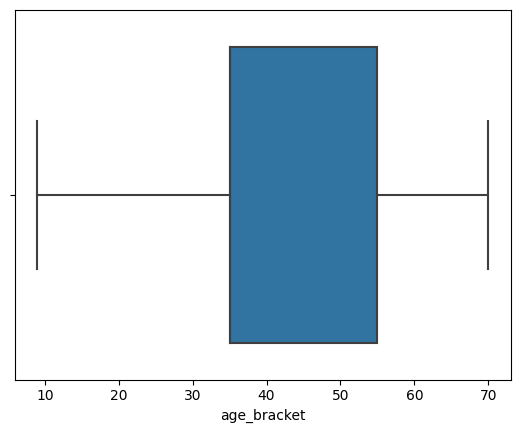

In [562]:
import seaborn as sns
sns.boxplot(x=df["age_bracket"])

<AxesSubplot:xlabel='total_nights'>

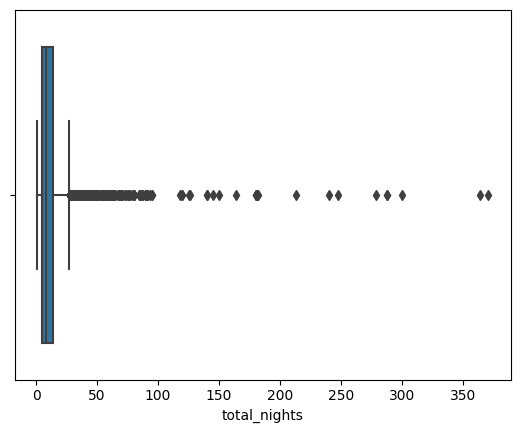

In [563]:
sns.boxplot(x=df["total_nights"])

<AxesSubplot:xlabel='tour_length'>

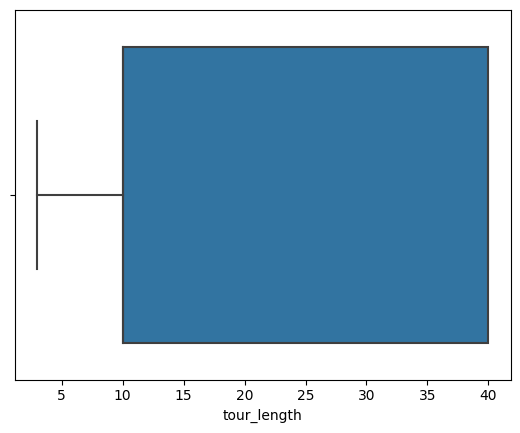

In [564]:
sns.boxplot(x=df["tour_length"])

<AxesSubplot:xlabel='spending'>

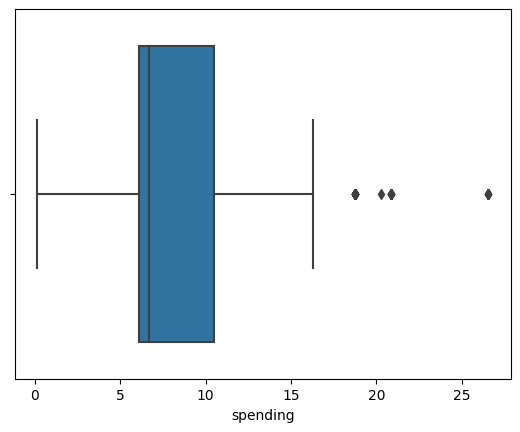

In [565]:
sns.boxplot(x=df["spending"])

### Correlation Between Features and with Target

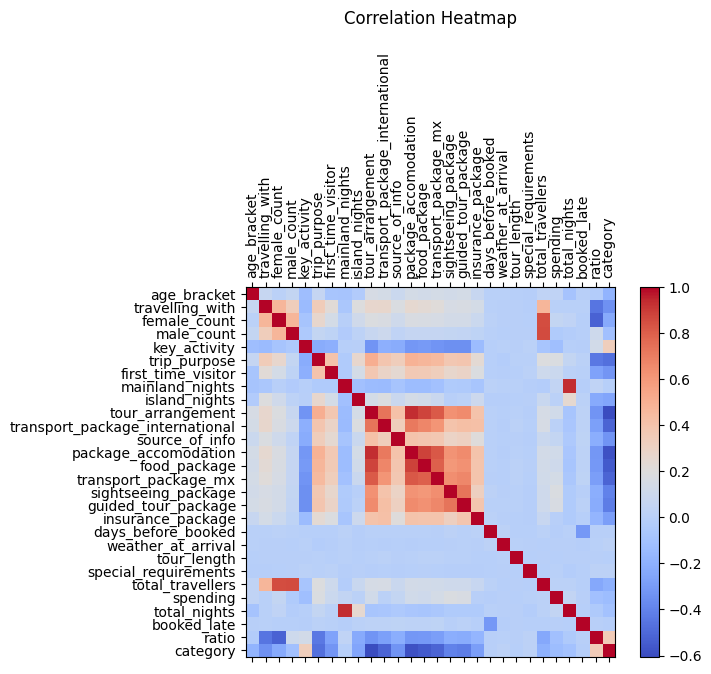

In [566]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr()

fig, ax = plt.subplots()
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))

ax.set_xticklabels(correlation_matrix.columns, rotation=90) 
ax.set_yticklabels(correlation_matrix.index)

plt.title("Correlation Heatmap", pad=20)
plt.show()
